In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score



%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
#imported both data sets

In [4]:
train = pd.read_csv('../datasets/train_clean.csv')

In [5]:
test = pd.read_csv('../datasets/test_clean.csv')

In [6]:
#created dummy variables for neighborhoods in temporary dataframe

In [7]:
tmp_train_dum = pd.get_dummies(train['neighborhood'],drop_first=True)

In [8]:
tmp_test_dum = pd.get_dummies(train['neighborhood'],drop_first=True)

In [9]:
#joined temp dataframes back to original dataframes

In [10]:
train = train.join(tmp_train_dum)
test = test.join(tmp_train_dum)

In [11]:
#added dummy variables to original variables used in first model
features=['total_bsmt_sf','gr_liv_area', 'tot_bath', 'tot_outdoor_space','house_age','lot_area',
            'garage_cars','Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR', 'Landmrk',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker']

In [12]:
#assigned features to variables that I will be testing and predicting
X_train = train[features]
X_test = test[features]
y_train = train['saleprice']

In [13]:
#started with a regular linear regression

In [14]:
lr = LinearRegression()

In [15]:
#fit the model against my traing variables
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lr.coef_

array([ 2.81224880e+01,  4.49505207e+01,  8.80154540e+03,  4.71842943e+01,
       -4.60356227e+02,  6.92272802e-01,  1.29472096e+04, -1.14636693e+04,
       -1.79934033e+04,  3.32507400e+03,  1.45453303e+03,  1.87842317e+03,
        2.97641516e+04, -1.76438193e+04, -8.34546339e+03,  1.52861883e+04,
        1.23989721e+05, -1.36774474e+04, -2.64511602e+04, -2.82265539e+04,
       -1.53305900e+04, -8.62389485e+03, -1.90922901e+04, -1.18007355e+04,
        4.40666329e+04,  7.06178106e+04, -8.71268140e+03, -6.99841072e+03,
       -1.01904615e+04, -1.00889448e+04,  1.87795707e+04,  8.36759390e+04,
        2.11328323e+04,  2.20602471e+04])

In [17]:
lr.intercept_

39720.318183907686

In [18]:
cross_val_score(lr, X_train, y_train,cv=5).mean()

0.7978181402481495

In [19]:
#R2 of 0.7978181. Small improve over previous model

In [20]:
predictions = lr.predict(X_train)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

In [21]:
#calculated residual, the difference betwen actual sale prices from the datafram and the predicted
#prices the model created

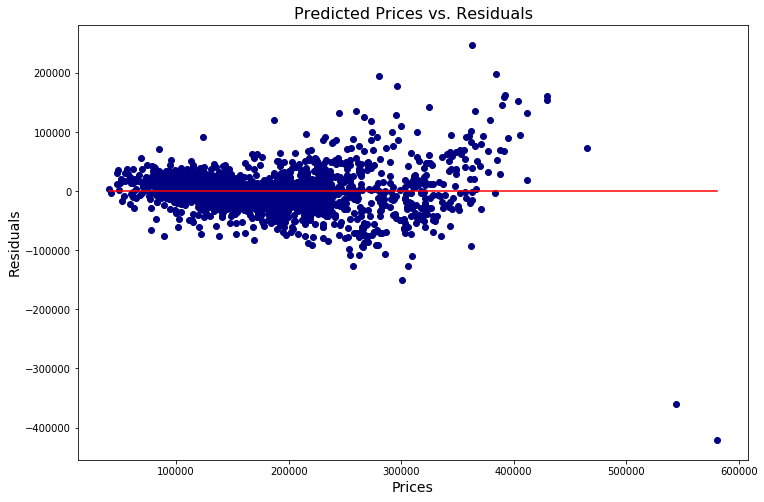

In [22]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [23]:
#I have variables of different units so I am going to standardize them

In [24]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [25]:
#refit model against standardize scale

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8077374778957324

In [27]:
#slightly improved R2

In [28]:
predictions = lr.predict(X_train)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

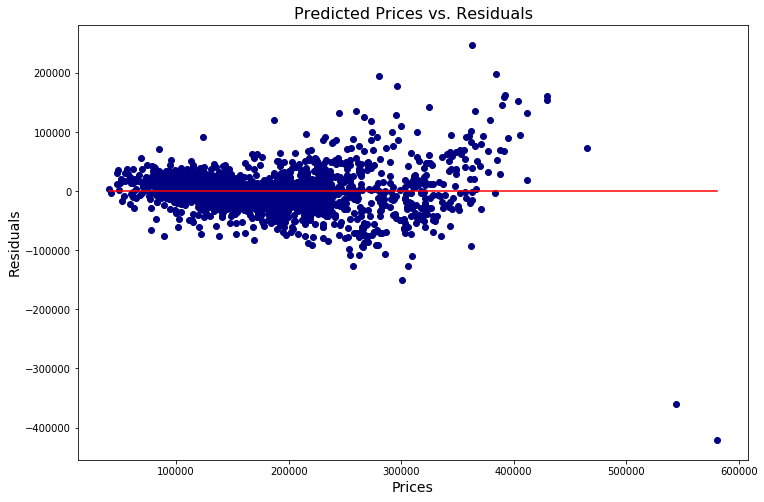

In [29]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [30]:
#ran model against X from the test set

In [31]:
test_predict = lr.predict(X_test)

In [32]:
#created a new dataframe for me submission 

In [33]:
submission = pd.DataFrame(columns=[])

In [34]:
#assigned data to dataframe

In [35]:
submission['Id'] = test['id']
submission['SalePrice'] = test_predict

In [36]:
submission.to_csv('../submissions/submission_two.csv',index=False)